In [16]:
import numpy as np
import cffi

In [3]:
import matplotlib.pyplot as plt

In [4]:
raw = np.fromfile('single_tone_v2.dat', dtype=np.int32)

In [10]:
mask = (1<<14) - 1

In [11]:
hex(mask)

'0x3fff'

In [12]:
raw[:10] & mask

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [13]:
def tohex(val, nbits=32):
  return hex((val + (1 << nbits)) % (1 << nbits))

In [14]:
for v in raw[:10]:
    print(v, tohex(v))

0 0x0
0 0x0
0 0x0
0 0x0
0 0x0
142213120 0x87a0000
153337856 0x923c000
-97320960 0xfa330000
-97402880 0xfa31c000
-97517568 0xfa300000


In [15]:
mark = raw & mask

In [16]:
bad = np.where(mark)

In [17]:
bad[0]

array([], dtype=int64)

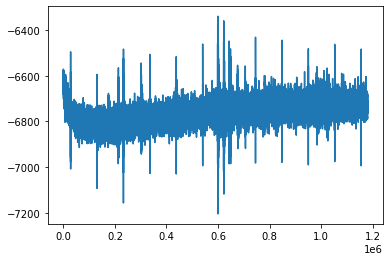

In [19]:
plt.plot(raw[100000:]>>14)

In [20]:
import scipy.signal

In [21]:
f,pxx = scipy.signal.welch(raw, fs=64000, scaling='spectrum')
# f,pxx = scipy.signal.periodogram(raw, fs=64000, window='barthann', nfft=1<<18)


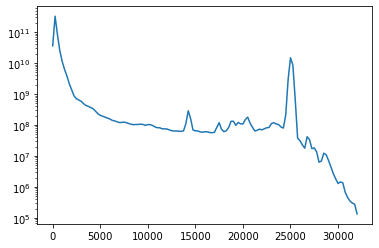

In [22]:
plt.semilogy(f,pxx)

In [19]:
def goertzel(x,k,N):
    w = 2*np.pi*k/N;
    cw = np.cos(w);
    c = 2*cw;
    sw = np.sin(w);
    z1=0;
    z2=0;
    for idx in range(N):
        z0 = x[idx] + c*z1 -z2;
        z2 = z1;
        z1 = z0;

    I = cw*z1 -z2;
    Q = sw*z1;

    P = z2*z2 + z1*z1 - c * z1*z2
    return I, Q, P

In [88]:
fft = np.fft.fft(raw[:(1<<16)])

In [89]:
g1 = goertzel(raw, 1, 1<<16)

In [90]:
g1

(1116244401246.0, -1360848487020.1355, 3.097910170941763e+24)

In [91]:
fft[0:2]

array([-7.52826761e+11+0.00000000e+00j,  1.11624441e+12-1.36084847e+12j])

In [26]:
Pxx = []
x = raw>>14
N = 64*4
k = 25*4
w = 2*np.pi*k/N;
cw = np.cos(w);
c = 2*cw;
sw = np.sin(w);
z1=0;
z2=0;
for idx in range(N):
    z0 = x[idx] + c*z1 -z2;
    z2 = z1;
    z1 = z0;

# I = cw*z1 -z2;
# Q = sw*z1;

P = z2*z2 + z1*z1 - c * z1*z2
Pxx.append(P)
# return I, Q, P



In [27]:
while (idx < (len(x)-1)):
    idx += 1
    z0 = x[idx] - x[idx-N] + c*z1 -z2;
    z2 = z1;
    z1 = z0;
    #y_real = z0 - cw*z1
    
    #y_real = cw*z1 -z2
    #y_imag = sw * z1
    #P = y_real * y_real + y_imag*y_imag
    P = z2*z2 + z1*z1 - c * z1*z2
    Pxx.append(P)
    #print(y_real, cw*z1-z2, y_imag, P)

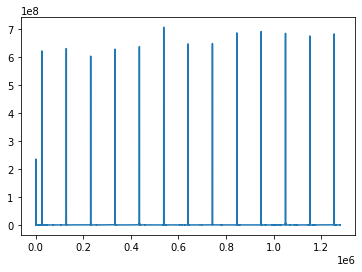

In [28]:
plt.plot(Pxx)

In [104]:
goertzel(raw[1:66], 25, 64)

(-400759697.8213548, -88151264.73155744, 1.6837898087163674e+17)

In [105]:
goertzel(raw[0:65], 25, 64)

(303291201.3661673, 322381109.9759593, 1.9591513289546464e+17)

In [135]:
gPxx = []
for idx in range(0, len(raw)-64):
    P = goertzel(raw[idx:(idx+65)], 25, 64)
    gPxx.append(P[2])

In [133]:
Pxx[:10]

[1.9591513289546464e+17,
 1.6837898087163674e+17,
 2.1042713333397133e+17,
 1.7293937759988118e+17,
 1.8883494742332512e+17,
 2.017427302474448e+17,
 1.2822664452533226e+17,
 103452586101.50644,
 171743749067.78986,
 148174141057.15863]

In [136]:
gPxx[:10]

[1.9591513289546464e+17,
 1.6837898087163674e+17,
 2.1042713333397133e+17,
 1.729393775998811e+17,
 1.8883494742332506e+17,
 2.0174273024744474e+17,
 1.2822664452533197e+17,
 103452586100.89662,
 171743749069.16727,
 148174141055.8787]

In [141]:
len(gPxx)

1279936

In [142]:
len(Pxx)

1279937

In [143]:
gPxx[-1]

119319715824.76599

In [144]:
Pxx[-2]

119319715819.04413

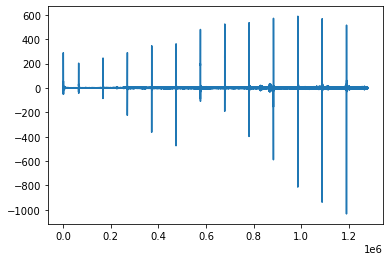

In [145]:
plt.plot(Pxx[:-1]- np.array(gPxx))

In [30]:
t = np.arange(64*4)
f = 25000
fs = 64000

cosine = np.cos(2*np.pi*f*t/fs)
sine = np.cos(2*np.pi*f*t/fs)

In [31]:
c_cross = np.correlate(x, cosine)
s_cross = np.correlate(x, sine)
crossP = c_cross*c_cross + s_cross*s_cross

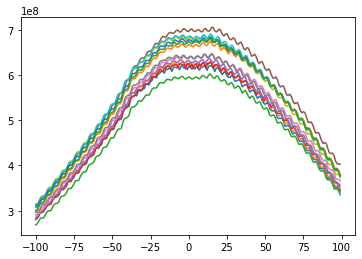

In [34]:
x = 25900
dx = np.arange(-100, 100)
Pxx = np.array(Pxx)
while x < len(Pxx):
    plt.plot(dx,Pxx[x+dx])
    x += 102400


In [191]:
x = raw>>14

In [192]:
Pxx = []
N = 64*4
k = 25*4
w = 2*np.pi*k/N;
cw = np.cos(w);
c = 2*cw;
sw = np.sin(w);
z1=0;
z2=0;
for idx in range(N):
    z0 = x[idx] + c*z1 -z2;
    z2 = z1;
    z1 = z0;

# I = cw*z1 -z2;
# Q = sw*z1;

P = z2*z2 + z1*z1 - c * z1*z2
Pxx.append(P)
# return I, Q, P


In [193]:
while (idx < (len(x)-1)):
    idx += 1
    z0 = x[idx] - x[idx-N] + c*z1 -z2;
    z2 = z1;
    z1 = z0;

    P = z2*z2 + z1*z1 - c * z1*z2
    Pxx.append(P)


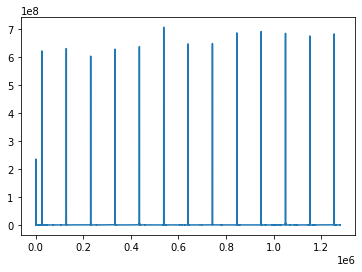

In [194]:
plt.plot(Pxx)

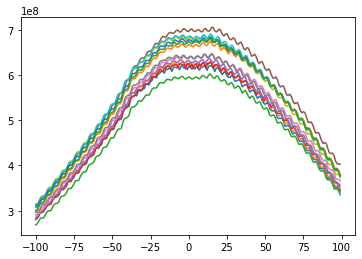

In [259]:
x = 25900
dx = np.arange(-100, 100)
Pxx = np.array(Pxx)
while x < len(Pxx):
    plt.plot(dx,Pxx[x+dx])
#pfit = np.polyfit(x, Pxx[x], 2)
#plt.plot(x, np.polyval(pfit, x))
    x += 102400
#plt.plot(dx,Pxx[x+dx])
#plt.axis([-100, 100, 3e8, 6.5e8])
#x += 102400
#plt.plot(dx,Pxx[x+dx])
#plt.axis([-100, 100, 3e8, 6.5e8])



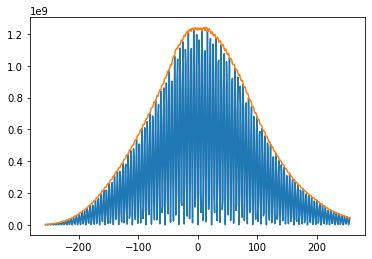

In [33]:
x = raw>>14
c_cross = np.correlate(x, cosine)
s_cross = np.correlate(x, sine)
crossP = c_cross*c_cross + s_cross*s_cross

x = 25900
dx = np.arange(-256, 256)
Pxx = np.array(Pxx)
plt.plot(dx,crossP[x+dx])
plt.plot(dx,2*Pxx[x+dx])


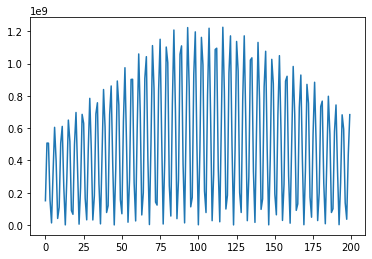

In [277]:
plt.plot(crossP[x+dx])
#plt.plot(Pxx)
#plt.axis([25000, 27000, 0, 14e8])

In [42]:
!nvim-qt

In [115]:
!gcc -shared -Wl,-install_name,adder.so -o adder.so -fPIC add.c

In [2]:

ffi = cffi.FFI()
ffi.cdef("""
int add_int(int, int);
float add_float(float, float);
double dbl_cos(double num);
float flt_cos(float num);
""")


In [3]:
C = ffi.dlopen('./adder.so')

In [4]:
C.add_float(3, 6)

9.0

In [5]:
C.dbl_cos(1.0)

0.5403023058681398

In [79]:
np.cos(1.0)

0.5403023058681398

In [6]:
C.flt_cos(1.0)

0.5403022766113281

In [11]:
ffi.dlclose(C)

In [1]:
import numpy as np
import cffi
import ctypes

In [2]:
!gcc -shared -Wl,-install_name,goertzel.so -o goertzel.so -fPIC goertzel.c

In [3]:
ffi = cffi.FFI()
ffi.cdef("""
double goertzel(int32_t *x, int32_t k);
double goertzel2(int32_t *x, int32_t k);
""")


In [4]:
C = ffi.dlopen('./goertzel.so')

In [5]:
raw = np.fromfile('single_tone_v2.dat', dtype=np.int32)
x = raw>>14
x_p = ffi.cast('int32_t *', x.ctypes.data)

In [42]:
%timeit goertzel(x, 100, 256)


871 µs ± 212 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [43]:
%timeit C.goertzel(x_p, 100)

2.43 µs ± 110 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [6]:
C.goertzel(x_p, 100)

116351040.91134441

In [7]:
C.goertzel2(x_p, 100)

116351040.91134441

In [38]:
ffi.dlclose(C)

In [46]:
import ctypes

In [53]:
lib = ctypes.cdll.LoadLibrary('./goertzel.so')

In [55]:
lib.goertzel2


AttributeError: dlsym(0x7f88a248b520, goertzel2): symbol not found

In [50]:
del C

In [51]:
del ffi

In [52]:
del lib